In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

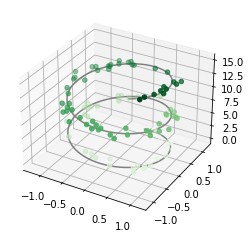

In [4]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
%matplotlib inline

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


In [5]:
from pathlib import Path

In [84]:
def read_file(path): 
    hf = h5py.File(path, 'r')
    
    n1 = hf.get('dataset_1')
    n1 = np.array(n1)
    
    finger_df = pd.DataFrame(finger_data, columns = ['id', 'x', 'y', 'z'])
    finger_df[finger_df['id'] == -1]
    
    
    
    for finger in range(0, 20): 
        
        one_finger = finger_data[finger_data['id'] == finger]
        times = one_finger.index.to_numpy()
        interpolate_func = interp1d(times, one_finger.to_numpy(), kind='cubic',
                                     axis=0)  # [n_regions, time_lenght]\

        one_finger_interp = interpolate_func(np.arange(times[0], times[-1]))


    # print('Size', hf.shape)
    return finger_df

In [45]:
import h5py

In [85]:
data_path = '../data/Experiment_1/22-01-29_myo'


finger_path = Path(data_path, 'position3_1.h5')
emg_path = Path(data_path, 'myography3_1.h5')


emg_data = read_file(emg_path)
finger_data = read_file(finger_path)


# position3_1.h5

In [86]:
finger_data.shape, emg_data.shape

((54895, 4), (54895, 4))

In [87]:
finger_data.shape

(54895, 4)

In [101]:
finger_data['id'].value_counts()

-1.00     17118
 9.00      1799
 16.00     1799
 15.00     1799
 14.00     1799
 13.00     1799
 12.00     1799
 11.00     1799
 10.00     1799
 8.00      1799
 7.00      1799
 6.00      1799
 5.00      1799
 4.00      1799
 3.00      1799
 2.00      1799
 1.00      1799
 0.00      1799
 17.00     1799
 19.00     1798
 20.00     1798
 18.00     1798
 0.01         1
Name: id, dtype: int64

In [141]:
np.arange(times[0], times[-1])

array([   21,    22,    23, ..., 54882, 54883, 54884])

In [140]:
times

array([   21,    47,    85, ..., 54843, 54864, 54885])

<AxesSubplot:>

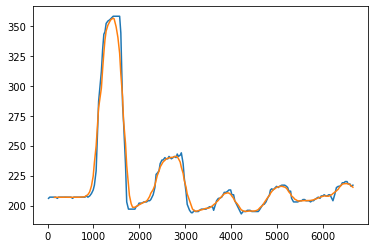

In [205]:
one_finger['x'][:200].plot()
res = one_finger['x'].rolling(window=9, win_type='gaussian', center=True).mean(std=5)
res[:200].plot()

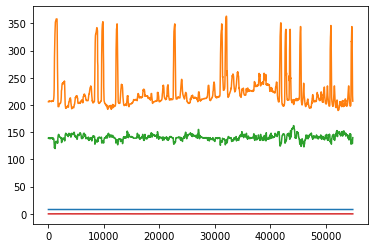

In [146]:
one_finger.shape
plt.plot(one_finger)

In [119]:
from scipy.interpolate import interp1d


In [150]:
one_finger_interp

array([[ 8.00000000e+00,  2.06000000e+02,  1.39000000e+02,
        -9.66578373e-04],
       [ 8.00000000e+00,  2.06066411e+02,  1.38994173e+02,
        -2.14773532e-04],
       [ 8.00000000e+00,  2.06130192e+02,  1.38988989e+02,
         4.87720917e-04],
       ...,
       [ 8.00000000e+00,  2.08030248e+02,  1.39391359e+02,
         1.19883954e-02],
       [ 8.00000000e+00,  2.07724392e+02,  1.39576452e+02,
         1.16555267e-02],
       [ 8.00000000e+00,  2.07381780e+02,  1.39779026e+02,
         1.13287180e-02]])

In [ ]:
times

array([   21,    47,    85, ..., 54843, 54864, 54885])

In [158]:
times.shape, one_finger.shape

((1799,), (1799, 4))

(0.0, 3000.0)

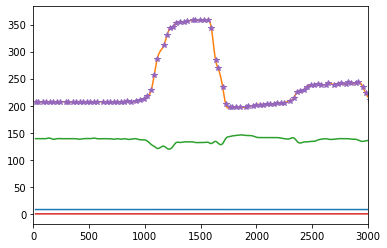

In [172]:
plt.plot(np.arange(times[0], times[-1]), one_finger_interp)
plt.plot(times, one_finger['x'], '*')
plt.xlim(0, 3000)


In [128]:
one_finger_interp.shape

(54864, 4)

In [ ]:
def interpolate_df_eeg_fmri(df_eeg, df_fmri):
    """
    Make alignment and interpolation of EEG and fMRI data based on two DataFrames with indexing( time)
    Crop EEG data by fmri times
    Make interpolation of fMRI data to 1000 Hz. Very big Jump.
    Add opportunity to use desired fps for interpolation( for example 250 Hz)

    df_eeg - n_milliseconds x n_channels
    df_fmri - n_recordings x n_roi
    """

    times_fmri = df_fmri.index.to_numpy()
    fmri_interpolate_func = interp1d(times_fmri, df_fmri.to_numpy().T, kind='cubic',
                                     axis=1)  # [n_regions, time_lenght]\

    # fmri_interpolate_func = interp1d(times_fmri, df_fmri.to_numpy().T, kind='bilinear', axis=1)  # [n_regions, time_lenght]\

    # get all index of eeg that correspond with fMRI  min< idxs < max
    times_eeg = df_eeg.index.to_numpy()
    filter_rule = (times_eeg > times_fmri[0]) & (times_eeg < times_fmri[-1])
    times_eeg = times_eeg[filter_rule]
    
    df_eeg_align = df_eeg.loc[times_eeg]
    
    

    # make interpolation and then make pandas dataframe
    fmri_interpolate = fmri_interpolate_func(times_eeg)
    df_fmri_interp = pd.DataFrame(fmri_interpolate.T, columns=df_fmri.columns)
    df_fmri_interp = df_fmri_interp.set_index(times_eeg)
    
    
    # get fps value of signals
    original_fps = 1 / (times_eeg[1] - times_eeg[0]) * 1000

    return df_eeg_align, df_fmri_interp, int(original_fps)

In [113]:
finger_data[finger_data['id'] == 1]

,id,x,y,z
14,1.0,422.0,142.0,-0.012019
40,1.0,423.0,143.0,-0.009831
78,1.0,422.0,142.0,-0.011532
104,1.0,423.0,143.0,-0.010471
142,1.0,423.0,142.0,-0.011171
...,...,...,...,...
54785,1.0,424.0,142.0,-0.005195
54806,1.0,421.0,142.0,-0.008354
54836,1.0,423.0,140.0,-0.018547
54857,1.0,422.0,140.0,-0.019722


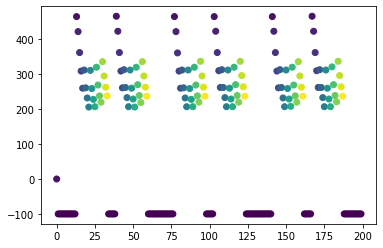

In [111]:
plt.scatter(np.arange(200), finger_data['x'][:200], c = finger_data['id'][:200])

In [ ]:
finger_datafinger_data[:, 0] == -1

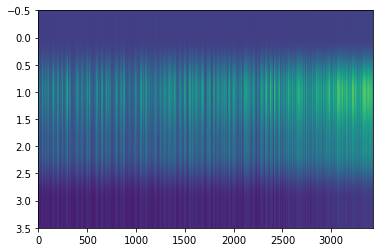

In [78]:
plt.imshow(finger_data[::16].T, aspect = 'auto')

In [71]:
unique, counts = np.unique(finger_data[:, 0], return_counts=True)
for i in range(len(counts)):
    print(unique[i], counts[i])

-1.0 17118
0.0 1799
0.01 1
1.0 1799
2.0 1799
3.0 1799
4.0 1799
5.0 1799
6.0 1799
7.0 1799
8.0 1799
9.0 1799
10.0 1799
11.0 1799
12.0 1799
13.0 1799
14.0 1799
15.0 1799
16.0 1799
17.0 1799
18.0 1798
19.0 1798
20.0 1798


In [ ]:

import h5py
import numpy as np
import time
import matplotlib.pyplot as plt
import os

hf = h5py.File('position.h5', 'r')
hfH = h5py.File('myography.h5', 'r')

n1 = hf.get('dataset_1')
n1 = np.array(n1)

n2 = hfH.get('dataset_1')
n2 = np.array(n2)
# plt.plot(n2)

# plt.plot(n2[1:,1])
# plt.show()
print(n1.shape)
#
# print(n1[:, 0] == 8)
#
# x_f = n1[n1[:, 0] == 8, :]
# x = x_f[:, 1]
# y = x_f[:, 2]
# x = x[x != -100]
# y = y[y != -100]
# plt.plot(x, y)
# plt.show()









In [18]:
# folder =
list(Path(data_path).glob("*"))

[]

In [16]:
print('ff')

ff
